### Uploading kaggle.json file in google colab environment and downloading the data in the collab environment using Kaggle API Command.
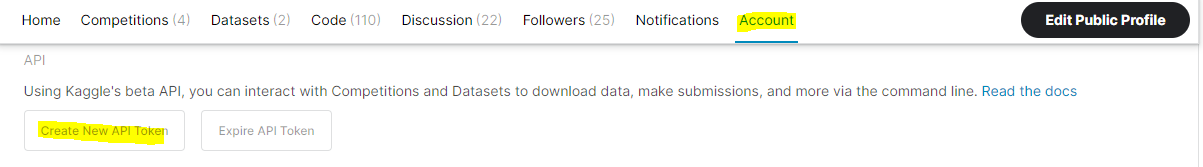

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset
!unzip fashion-product-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating: fashion

### **Importing Neccesary Libraries for further processing**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # used since it takes a different kind of axis in order to actually graph something in three dimensions
from sklearn.preprocessing import StandardScaler # used to standardize features by removing the mean and scaling to unit variance.
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # The image module supports basic image loading, rescaling and display operations.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import plotly.express as px
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### **Loading the data**

In [ ]:
DATASET_PATH = "/content/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH)) # used to get the list of all files and directories in the specified directory.

['styles.csv', 'images.csv', 'images', 'styles']


In [ ]:
# Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised, and no DataFrame will be returned. 
# If False, then these “bad lines” will be dropped from the DataFrame that is returned.
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)  

# Appending row id with .jpg extension
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

# Resetting the index
df = df.reset_index(drop=True)

df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [ ]:
# Checking for sum of null values 
df.isnull().sum()

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                 1
year                   0
usage                 47
productDisplayName     1
image                  0
dtype: int64

### **Getting a glimpse of the data**

In [ ]:
import cv2

"""Plot a dictionary of figures.

  Parameters are: 
  figures : <title, figure> dictionary
  ncols : number of columns of subplots wanted in the display
  nrows : number of rows of subplots wanted in the figure
"""

def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize) # subplot creates a figure and a set of subplots

    for ind,title in enumerate(figures): #  adds a counter to an iterable and returns it in a form of enumerating object
        
        # ravel returns a 1D array with all the input-array elements and with the same type as it
        # cv2.cvtColor() method is used to convert an image from one color space to another.
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

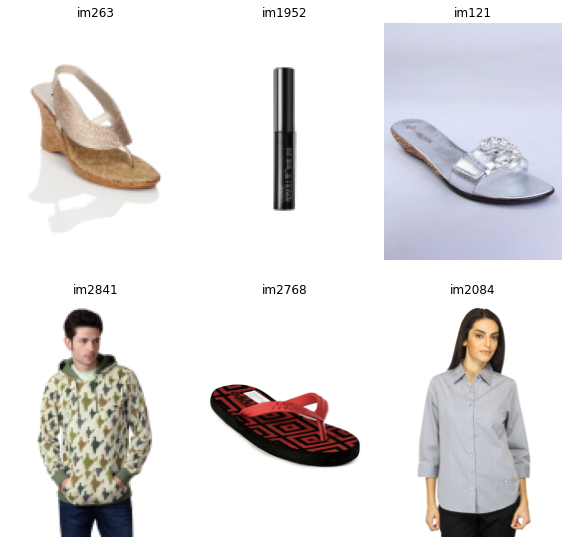

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}

# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

**The Dataset is made up of different items that can be found in a marketplace. The idea is to use embeddings to search for similarity and find similar items just using the image.**

### Explanatory Data Analysis

**1. Count Plot of all type of elements present.**

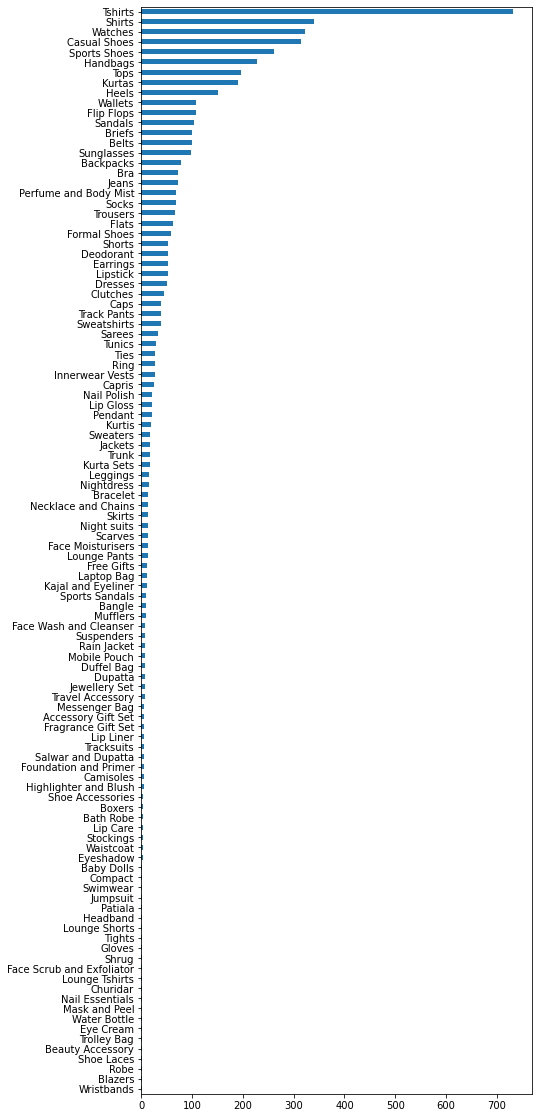

In [ ]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

**2. Main Categories Count**

In [ ]:
fig = px.bar(df.groupby('masterCategory').count().reset_index(), x='masterCategory',y='id',title='Count per Product Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

**3. Sub Categories Count**

In [ ]:
fig = px.bar(df.groupby('subCategory').count().reset_index(), x='subCategory',y='id',title='Count per Product Sub-category', color='subCategory')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

**4. Products by Season Count**

In [ ]:
fig = px.bar(df.groupby('season').count().reset_index(), x='season', y='id', title='Count per Season Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

**5. Product Usage type Count**

In [ ]:
fig = px.bar(df.groupby('usage').count().reset_index(), x='usage', y='id', title='Count per Usage Category')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

### **Use Pre-Trained Model to Recommendation**

In [ ]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
import keras.utils as image
tf.__version__

'2.9.2'

 **We will extract the features of the image using the pre-trained Resnet50 network
We will extract the final features of the network by using global average pooling on the final convolutional block of the network**




In [ ]:
# Input Shape
img_width, img_height, _ = 224, 224, 3

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([    
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    
    # img to Array
    x   = image.img_to_array(img)
    
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    
    # Pre process Input
    x   = preprocess_input(x)
    
    return model.predict(x).reshape(-1)

**Get Item Embeddings**

In [ ]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

1/1 [==============================] - 9s 9s/step


(2048,)

(240, 180, 3)
[ 5.6613116  2.3661637  0.        ...  1.313862   0.        10.820526 ]


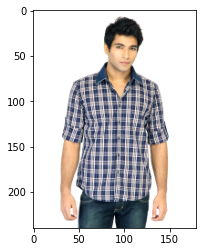

In [ ]:
img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [ ]:
df.shape

(5000, 11)

### **Get Embedding for all items in dataset**

In [ ]:
%%time
import swifter

# Parallel apply
df_sample      = df
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
(5000, 2048)
CPU times: user 7min 58s, sys: 14.9 s, total: 8min 13s
Wall time: 9min 9s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.661312,2.366164,0.000000,3.255731,0.845206,2.673843,8.780876,6.280790,0.787187,1.587657,...,2.463608,0.000000,1.825998,20.485266,3.902868,0.000000,8.225967,1.313862,0.000000,10.820526
1,5.790416,9.593647,0.000000,9.431677,0.287242,0.259948,17.028763,3.037457,0.136343,0.000000,...,1.670569,0.013892,10.338691,4.784727,0.189140,0.000000,7.739136,0.372690,0.000000,8.903806
2,0.000000,3.162255,0.484693,0.172297,2.609548,3.840856,3.426135,0.253245,1.098909,1.418282,...,0.434923,14.092846,3.018754,2.134505,2.549058,0.377385,6.180349,0.636617,14.018167,11.415049
3,5.882207,1.958612,0.000000,12.519880,0.000000,0.000000,9.383588,3.781611,0.000000,1.490627,...,17.825478,0.000000,3.592507,2.042305,0.000000,0.000000,6.656782,1.457315,1.694209,1.403316
4,0.245968,17.383427,0.493822,3.374466,2.567374,0.000000,6.482546,5.862640,0.000000,3.164860,...,4.464023,0.447078,1.448140,12.884144,0.000000,0.397500,5.028075,1.939697,0.000000,11.485403


**Here we are visualising our latent spaces since our latent space is not two-dimensional, we will use TSNE to reduce dimensionality**

In [ ]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
time_start = time.time()
#perplexity is related to the number of nearest neighbors that is used in other learning algorithms range btw 5 to 50
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300) 
tsne_results = tsne.fit_transform(df_embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 15.633707046508789 seconds


In [ ]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

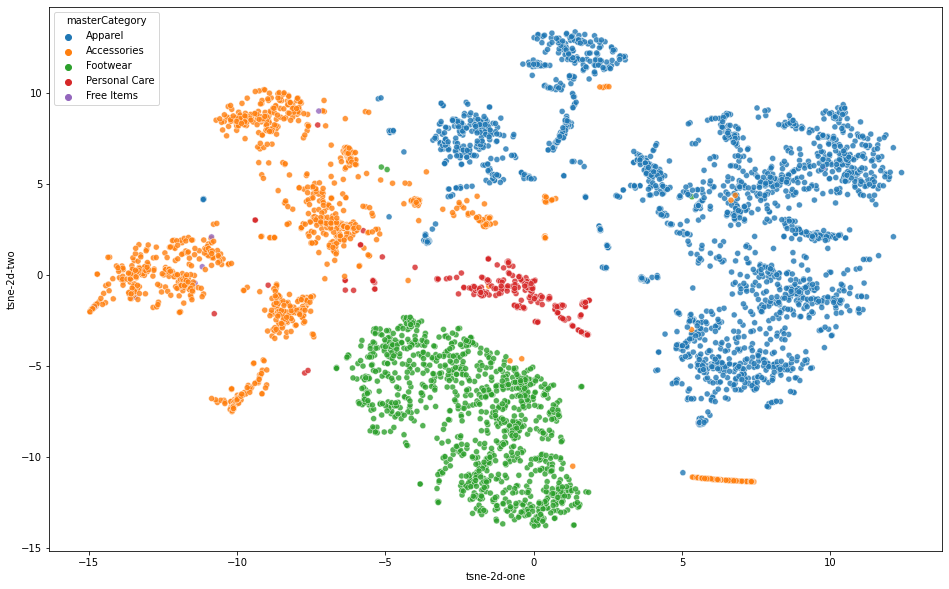

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="masterCategory",
                data=df,
                legend="full",
                alpha=0.8)

**We can see different clusters generated by embeddings, which means that features make sense. 
In this image above it is possible to observe the separation by Category, and in more detail by subcategory.** 

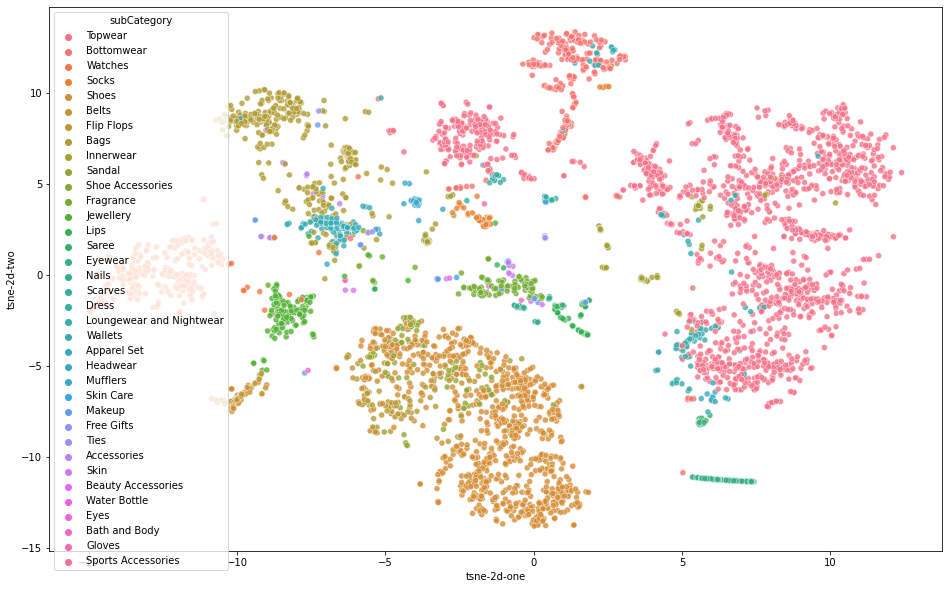

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="subCategory",
                data=df,
                legend="full",
                alpha=0.8)

### **Computing Similarity Between items**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.71344966, 0.45427233, 0.67970586],
       [0.71344966, 0.9999994 , 0.4151531 , 0.8333088 ],
       [0.45427233, 0.4151531 , 0.9999992 , 0.44629467],
       [0.67970586, 0.8333088 , 0.44629467, 0.9999993 ]], dtype=float32)

### **Recommender Similar Items**

In [ ]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get fashion recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.9236279, 0.92232645, 0.9190419, 0.9150868, 0.9131172])

**Recommending item for differnt ids**

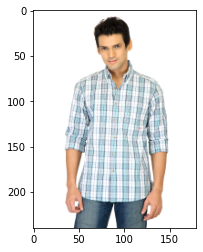

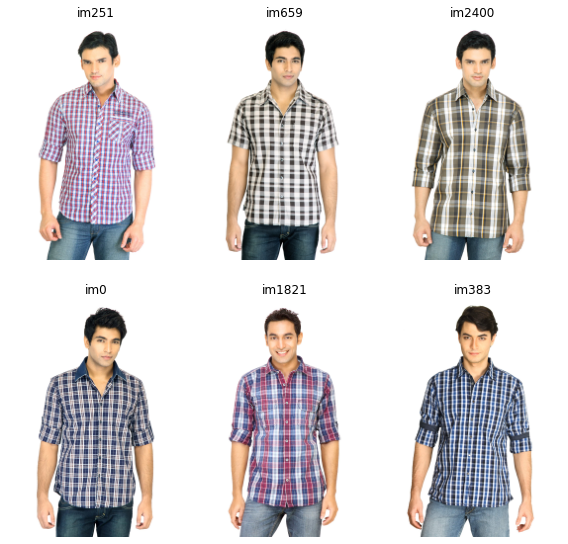

In [ ]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

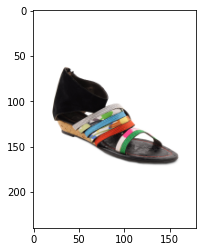

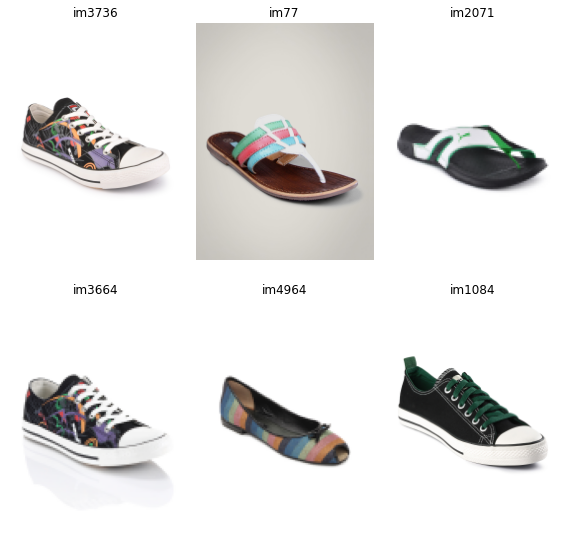

In [ ]:
# Idx Item to Recommender
idx_ref = 1998

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

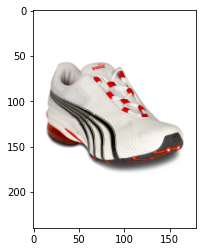

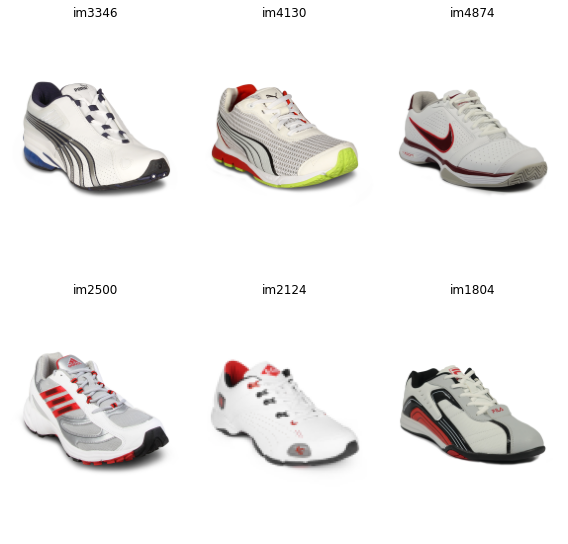

In [ ]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

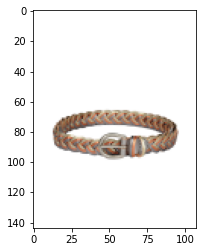

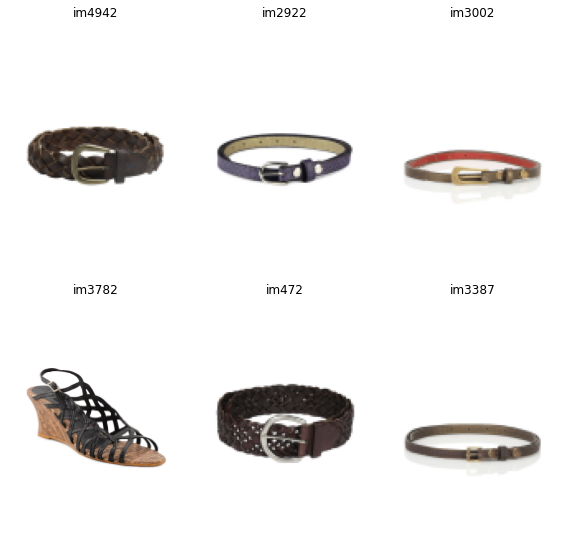

In [ ]:
idx_ref = 3524

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)